### Question 2
You have 2 categories of training data which are audio files (in folders), and 2 audio files which are unlabeled. The categories
are 'CategoryA' and 'CategoryB' while the unknown ones are 'CategoryU'. The objective is to predict whether the audio files in CategoryU are 'A' or 'B'.

a) Display the 'periodogram' and 'spectrogram' for 1 file in CategoryA, 1 file in CategoryB, and the 2 files in CategoryU.
They should be presented in 2 figures where the first figure shows only the periodograms (2x2 subplots) and the other figure
the spectrograms (2x2 subplots). (3 points)

b) Use KNN on the periodogram data to find the labels of the files 'U' and explore difierent values of 'K' to see how the
performance changes. (3 points)

c) Apply GMM to the periodograms of each training category. There are difierent ways to approach this and one is to
take the average periodogram and fit the GMM to it. Then use the GMM models to assess the labels of the CategoryU files.
(3 points)

d) Use the periodogram data to make predictions for 'U' this time using PCA. If there are too many dimensions you can
reduce the resolution by smoothing and then subsampling. From PCA take the 2 largest axis of variance and then project
each training data point on that space with different colored markers. Then project the 2 data from the 'U' files on that
space to provide a conclusion for the labels of 'U' files. (3 points)

e) Apply another approach to compare (eg. decision trees or random forests) to make a prediction. (3 points)

In [344]:
cd("C:/Work/Project/STA7722/Assignment/Assgn2")

In [545]:
import Pkg; 
#Pkg.add("DSP")
#Pkg.add("WAV")
#Pkg.add("ChemometricsTools")
#Pkg.add("NearestNeighbors")
#Pkg.add("GaussianMixtures")
#Pkg.add("SampledSignals")
Pkg.add("DecisionTree")

   Resolving package versions...
   Installed DecisionTree ─ v0.10.11
    Updating `C:\Users\alice\.julia\environments\v1.7\Project.toml`
  [7806a523] + DecisionTree v0.10.11
    Updating `C:\Users\alice\.julia\environments\v1.7\Manifest.toml`
  [7806a523] + DecisionTree v0.10.11
Precompiling project...
  ✓ DecisionTree
  1 dependency successfully precompiled in 2 seconds (297 already precompiled)


In [546]:
using DSP, WAV
using Plots
# using AbstractFFTs
using ChemometricsTools
# using Shapefile
using Images, ImageMagick
using StatsBase
using Distances
using Statistics
using Random
using NearestNeighbors
using GaussianMixtures
using SampledSignals
using DecisionTree
# using FFTW


In [346]:
#read files
Path_A = "./categoryA/"
fileWAV_A = readdir(Path_A)
Path_B = "./categoryB/"
fileWAV_B = readdir(Path_B)
Path_U = "./categoryU/"
fileWAV_U = readdir(Path_U)
println(size(fileWAV_A))
println(fileWAV_A)


(6,)
["DeeYanKey-Andante.wav", "background full (FREE DOWNLOAD)-1213771396.wav", "background music (FREE DOWNLOAD)-1219856890.wav", "hd audio background (FREE DOWNLOAD)-1213766218.wav", "play background (FREE DOWNLOAD)-1219852972.wav", "your background (FREE DOWNLOAD)-1219830094.wav"]


### a) Display the 'periodogram' and 'spectrogram' for 1 file in CategoryA, 1 file in CategoryB, and the 2 files in CategoryU. They should be presented in 2 figures where the first figure shows only the periodograms (2x2 subplots) and the other figure the spectrograms (2x2 subplots). (3 points)

In [347]:
A_signals = [] subrange=
Fs_A = []
for filename in 1:length(fileWAV_A)
    ss, Fs = wavread(string(Path_A,fileWAV_A[filename]))
    ss = vec(ss)
    push!(A_signals,ss)
    push!(Fs_A,Fs)
end

In [348]:
B_signals = []
Fs_B = []
for filename in 1:length(fileWAV_B)
    ss, Fs = wavread(string(Path_B,fileWAV_B[filename]))
    ss = vec(ss)
    push!(B_signals,ss)
    push!(Fs_B,Fs)
end

In [349]:
U_signals = []
Fs_U = []
for filename in 1:length(fileWAV_U)
    ss, Fs = wavread(string(Path_U,fileWAV_U[filename]))
    ss = vec(ss)
    push!(U_signals,ss)
    push!(Fs_U,Fs)
end

In [350]:
#Produce a spectrogram of the audio for one of each in Category A, B and both files in U
sampleInterval = 100
resolutionWin = 1000
smooth = 50
spgrmA1 = DSP.Periodograms.spectrogram(A_signals[1][1:sampleInterval:end],
       resolutionWin, smooth, fs=Fs_A[1], window=DSP.Windows.hamming)
spgrmB1 = DSP.Periodograms.spectrogram(B_signals[6][1:sampleInterval:end],
       resolutionWin, smooth, fs=Fs_B[6], window=DSP.Windows.hamming)
spgrmU1 = DSP.Periodograms.spectrogram(U_signals[1][1:sampleInterval:end],
       resolutionWin, smooth, fs=Fs_U[1], window=DSP.Windows.hamming)
spgrmU2 = DSP.Periodograms.spectrogram(U_signals[2][1:sampleInterval:end],
       resolutionWin, smooth, fs=Fs_U[2], window=DSP.Windows.hamming)

DSP.Periodograms.Spectrogram{Float64, AbstractFFTs.Frequencies{Float32}, Matrix{Float64}}([7.158628311692767e-13 1.3625254328406907e-7 … 6.424685864217548e-14 4.118427186546383e-13; 4.067601665056796e-12 1.3574115287967293e-7 … 1.5646974034011614e-13 4.535560540976692e-13; … ; 6.53350498519207e-12 9.46492734484808e-9 … 2.2056041329086447e-13 2.997503679708745e-14; 2.7729362696904896e-12 6.593817879285637e-9 … 3.497181230660633e-14 2.7022011080191496e-14], Float32[0.0, 44.1, 88.2, 132.29999, 176.4, 220.5, 264.59998, 308.69998, 352.8, 396.9  …  21653.1, 21697.2, 21741.299, 21785.398, 21829.5, 21873.6, 21917.7, 21961.799, 22005.898, 22050.0], 0.011337868480725623:0.021541950113378686:2.639455782312925)

### Plot the spectrogram

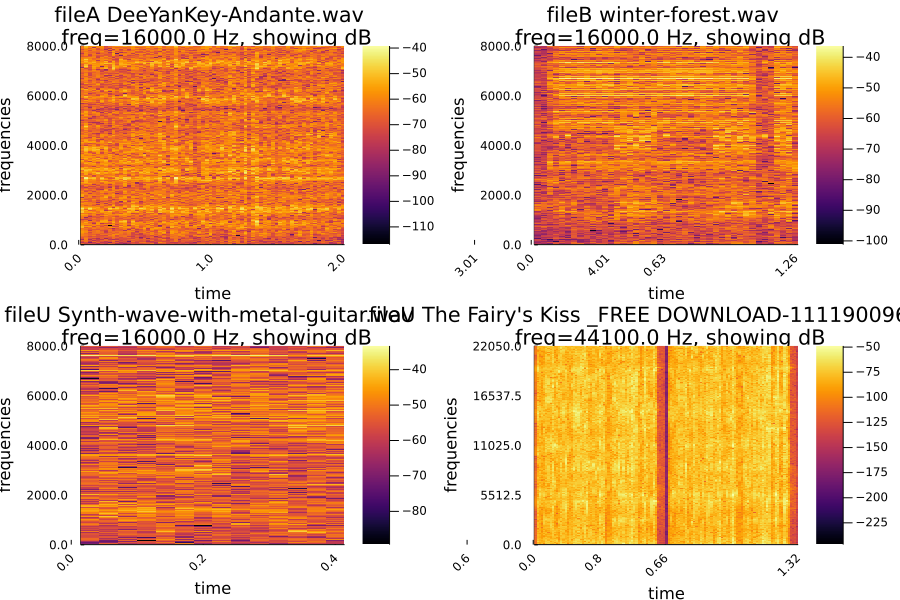

In [351]:
hmapA1 = heatmap( pow2db.(spgrmA1.power),xlabel="time",xrotation=45,          
              yticks=(range(0,stop=spgrmA1.freq.n,length=5),
                  string.(range(0,stop=maximum(Int.(round.(spgrmA1.freq))),length=5)))   ,ylabel="frequencies",
     xticks=( round.(range(0,stop=2*length(spgrmA1.time),length=5),digits=2),
             string.(round.(range(0,stop=maximum(spgrmA1.time),length=5),digits=2)))  ,legend=true, 
     title="fileA $(fileWAV_A[1]) \n freq=$(Fs_A[1]) Hz, showing dB")
hmapB1 = heatmap( pow2db.(spgrmB1.power),xlabel="time",xrotation=45,          
              yticks=(range(0,stop=spgrmB1.freq.n,length=5),
                  string.(range(0,stop=maximum(Int.(round.(spgrmB1.freq))),length=5)))   ,ylabel="frequencies",
     xticks=( round.(range(0,stop=2*length(spgrmB1.time),length=5),digits=2),
             string.(round.(range(0,stop=maximum(spgrmB1.time),length=5),digits=2)))  ,legend=true, 
     title="fileB $(fileWAV_B[6]) \n freq=$(Fs_B[6]) Hz, showing dB")
hmapU1 = heatmap( pow2db.(spgrmU1.power),xlabel="time",xrotation=45,          
              yticks=(range(0,stop=spgrmU1.freq.n,length=5),
                  string.(range(0,stop=maximum(Int.(round.(spgrmU1.freq))),length=5)))   ,ylabel="frequencies",
     xticks=( round.(range(0,stop=2*length(spgrmU1.time),length=5),digits=2),
             string.(round.(range(0,stop=maximum(spgrmU1.time),length=5),digits=2)))  ,legend=true, 
     title="fileU $(fileWAV_U[1]) \n freq=$(Fs_U[1]) Hz, showing dB")
hmapU2 = heatmap( pow2db.(spgrmU2.power),xlabel="time",xrotation=45,          
              yticks=(range(0,stop=spgrmU2.freq.n,length=5),
                  string.(range(0,stop=maximum(Int.(round.(spgrmU2.freq))),length=5)))   ,ylabel="frequencies",
     xticks=( round.(range(0,stop=2*length(spgrmU2.time),length=5),digits=2),
             string.(round.(range(0,stop=maximum(spgrmU2.time),length=5),digits=2)))  ,legend=true, 
     title="fileU $(fileWAV_U[2]) \n freq=$(Fs_U[2]) Hz, showing dB")


pA1 = plot(hmapA1);pB1= plot(hmapB1);pU1= plot(hmapU1);pU2= plot(hmapU2)

p1 = plot(pA1,pB1,pU1,pU2,layout=grid(2,2),size=(900,600))


savefig(p1,"figs/fig1Spectrogram.png")
display("image/png", p1) #p1

### Plot the periodogram

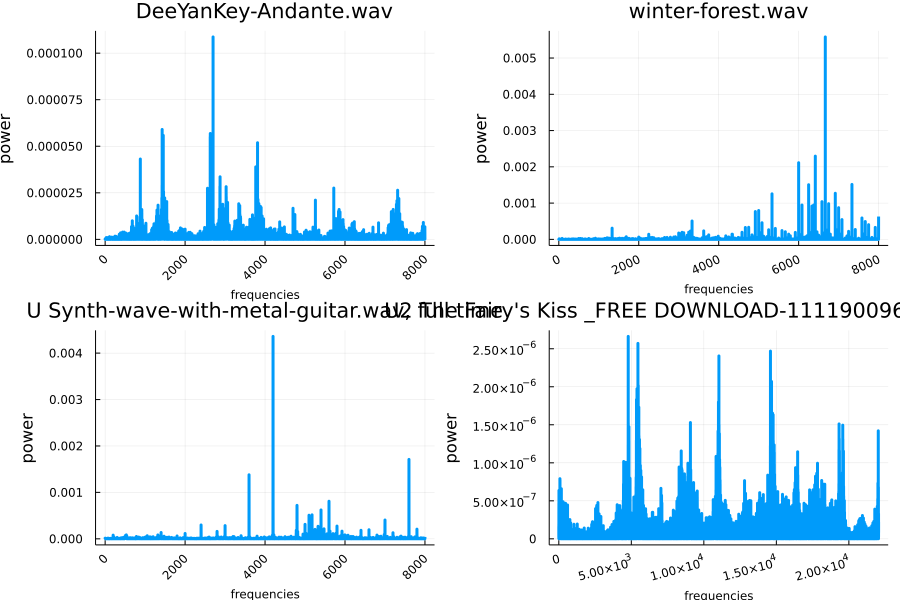

In [352]:
# plot the periodogram 
# power spectral density (PSD)

prdgrmFULLA1 = DSP.Periodograms.periodogram(A_signals[1][1:sampleInterval:end], fs=Fs_A[1], window=DSP.Windows.hamming)
pA1 = plot(prdgrmFULLA1.freq,prdgrmFULLA1.power,legend=false,linewidth=3,xrotation=45,         
               xlabel="frequencies",xguidefontsize=8,xtickfontsize=8,ylabel="power",
                title=fileWAV_A[1])
prdgrmFULLB1 = DSP.Periodograms.periodogram(B_signals[6][1:sampleInterval:end], fs=Fs_B[6], window=DSP.Windows.hamming)
pB1 = plot(prdgrmFULLB1.freq,prdgrmFULLB1.power,legend=false,linewidth=3,xrotation=25,         
               xlabel="frequencies",xguidefontsize=8,xtickfontsize=8,ylabel="power",
                title=fileWAV_B[6])
prdgrmFULLU1 = DSP.Periodograms.periodogram(U_signals[1][1:sampleInterval:end], fs=Fs_U[1], window=DSP.Windows.hamming)
pU1 = plot(prdgrmFULLU1.freq,prdgrmFULLU1.power,legend=false,linewidth=3,xrotation=45,         
               xlabel="frequencies",xguidefontsize=8,xtickfontsize=8,ylabel="power",
                title="U $(fileWAV_U[1]), full time")
prdgrmFULLU2 = DSP.Periodograms.periodogram(U_signals[2][1:sampleInterval:end], fs=Fs_U[2], window=DSP.Windows.hamming)
pU2 = plot(prdgrmFULLU2.freq,prdgrmFULLU2.power,legend=false,linewidth=3,xrotation=15,         
               xlabel="frequencies",xguidefontsize=8,xtickfontsize=8,ylabel="power",
                title="U2 $(fileWAV_U[2]), full time")
p2 = plot(pA1,pB1,pU1,pU2,layout=grid(2,2),size=(900,600))

savefig(p2,"figs/songPeriodogramFULL")
display("image/png", p2) #p2

### b) Use KNN on the periodogram data to find the labels of the files 'U' and explore difierent values of 'K' to see how the performance changes. (3 points)

In [353]:
#read all 6 files from Category A, Category B and find top 2 top power corresponding frequencies for all 12 files.
ss_ind = 1
top_frequencies = Array{Float64}(undef, 0, 2)

for ss_ind in 1:length(A_signals)

    prdgrm = DSP.Periodograms.periodogram(A_signals[ss_ind], fs=Int(Fs_A[ss_ind]), window=DSP.Windows.hamming)
    top_freqs_A = prdgrm.freq[sortperm(prdgrm.power,rev=true)[1:2]]
    prdgrm = DSP.Periodograms.periodogram(B_signals[ss_ind], fs=Int(Fs_B[ss_ind]), window=DSP.Windows.hamming)
    top_freqs_B = prdgrm.freq[sortperm(prdgrm.power,rev=true)[1:2]]
        
    top_frequencies = vcat(top_frequencies,top_freqs_A',top_freqs_B')
end

In [354]:
#read 2 U files and find top power corresponding frequencies
ss_ind = 1
top_frequencies_U = Array{Float64}(undef, 0, 2)

for ss_ind in 1:length(U_signals)
    
    prdgrm = DSP.Periodograms.periodogram(U_signals[ss_ind], fs=Int(Fs_U[ss_ind]), window=DSP.Windows.hamming)
    top_freqs_U = prdgrm.freq[sortperm(prdgrm.power,rev=true)[1:2]]
    
    top_frequencies_U = vcat(top_frequencies_U,top_freqs_U')
end

In [355]:
labels = repeat(["Category A","Category B"],length(A_signals)) 
print(labels)

["Category A", "Category B", "Category A", "Category B", "Category A", "Category B", "Category A", "Category B", "Category A", "Category B", "Category A", "Category B"]

In [203]:
top_frequencies_U[:,:]

2×2 Matrix{Float64}:
  41.999   83.998
 393.142  393.138

In [356]:
#labels_U = repeat(["Category U"],length(U_signals))
labels_U = ["Category U1","Category U2"]
print(labels_U)

["Category U1", "Category U2"]

### Visualize top power corresponding frequencies.  Category A is in <span style='color:red'> red </span>, and Category B is in <span style='color:blue'> blue </span>, Unknown Category is in  <span style='color:yellow'> yellow </span>. We can see that Music U1 Synth-wave-with-metal-guitar.wav is close to <span style='color:blue'> blue points </span>, potentionally classified as Category B, and U2 The Fairy's Kiss _FREE DOWNLOAD-111190096.wav is close to <span style='color:red'> red points </span> , potentionally is classified as Category A.

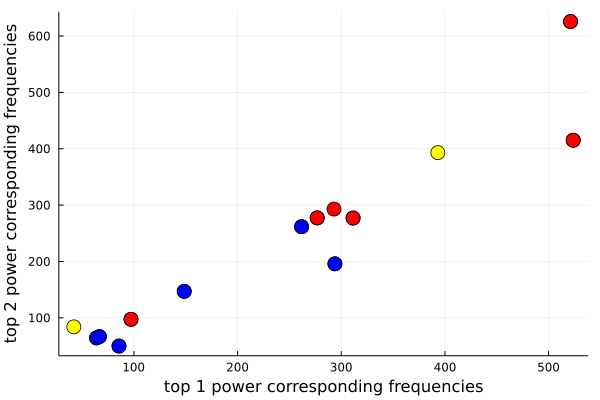

In [357]:
# typeof(data)
col_cat = repeat(["red","blue"],length(labels)) 
pp_train = scatter( [top_frequencies[:,1]],[top_frequencies[:,2]], legend=true,color=col_cat[1], markersize=8,
    labels=labels)

for ii in 2:size(top_frequencies)[1]
    [ (scatter!( pp_train,[top_frequencies[ii,1]], [top_frequencies[ii,2]], color=col_cat[ii], markersize=8,
                labels=labels)) ]
end

# add test point to plot
scatter!(pp_train,[top_frequencies_U[:,1]],[top_frequencies_U[:,2]],legend=false, color="yellow", markersize=8 ) 
        
xlabel!("top 1 power corresponding frequencies")
ylabel!("top 2 power corresponding frequencies")
plot(pp_train)

In [381]:
# identify index numbers for training and validation, and split train and validation 70/30 

function perclass_splits(y, percent)
    uniq_class = unique(y)
    keep_index = []
    for class in uniq_class
        class_index = findall(y .== class)
        row_index = randsubseq(class_index, percent)
        push!(keep_index, row_index...)
    end
    return keep_index
end

Random.seed!(1)

index_train = perclass_splits(labels, 0.67)

index_valid = setdiff(1:length(labels), index_train)

index_test = [1,2]

2-element Vector{Int64}:
 1
 2

In [382]:
# split data between training and validation

X_train = top_frequencies[index_train, :]

X_valid = top_frequencies[index_valid, :]

y_train = labels[index_train]

y_valid = labels[index_valid]

y_test = labels_U[index_test]

2-element Vector{String}:
 "Category U1"
 "Category U2"

In [383]:
# identify index numbers for training and testing

# transpose data
X_train_t = permutedims(X_train)
X_valid_t = permutedims(X_valid)
X_test_t = permutedims(top_frequencies_U)

# build tree
kdtree = KDTree(X_train_t)  #to arrange data for knn efficiently 

KDTree{StaticArrays.SVector{2, Float64}, Euclidean, Float64}
  Number of points: 7
  Dimensions: 2
  Metric: Euclidean(0.0)
  Reordered: true

In [384]:
#Try different k to check accuracy
function acc(X_valid_t)
    accuracy = []
        for k in 1:length(y_train)
        index_knn, distances = knn(kdtree, X_valid_t, k, true)
        index_knn_matrix = hcat(index_knn...)

        index_knn_matrix_t = permutedims(index_knn_matrix)

        knn_classes = y_train[index_knn_matrix_t]
    
        # use StatsBase to make predictions
        y_hat = [
            argmax(countmap(knn_classes[i, :]))
            for i in 1:length(y_valid)
        ]
        accuracy1 = mean(y_hat .== y_valid)
        push!(accuracy,accuracy1)
    end 
    return accuracy
end 

acc (generic function with 1 method)

In [390]:
accuracy=acc(X_valid_t)
println("for number of k neighbors = 1 to $(length(y_train)), accuracy is $(accuracy) respectively. ")

for number of k neighbors = 1 to 7, accuracy is Any[0.6, 0.6, 0.6, 0.6, 1.0, 0.6, 0.4] respectively. 


### In the limited 12 points, if spliting data as 67/33, we can see from the line plot that k=5 has 100% accuracy. Thus, we can use k=5 for prediction on the unknown category U.

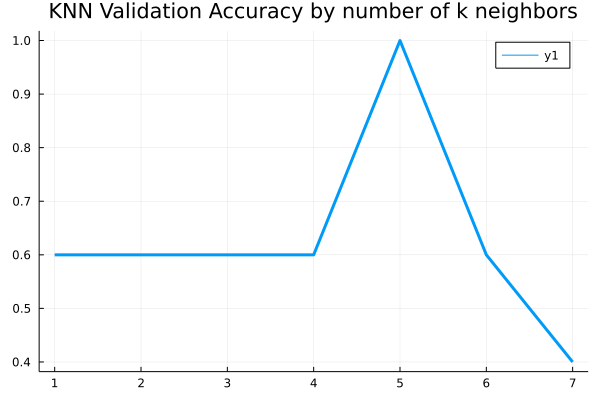

In [391]:
#plot accuracy as k increase from 1 to number of training points
plot(1:length(y_train), accuracy, title = "KNN Validation Accuracy by number of k neighbors",  lw = 3)

In [392]:
# run the selected model
k = 5

index_knn, distances = knn(kdtree, X_valid_t, k, true)

# display output

output = [index_valid index_knn distances]
output


5×3 Matrix{Any}:
 2  [7, 4, 6, 5, 1]  [3.56073, 46.8319, 264.864, 279.388, 323.631]
 4  [4, 7, 6, 5, 1]  [71.3919, 114.67, 153.359, 161.178, 205.42]
 5  [5, 1, 6, 4, 3]  [21.7273, 22.523, 83.2788, 254.28, 282.798]
 6  [7, 4, 6, 5, 1]  [25.2708, 48.829, 254.3, 275.442, 319.525]
 9  [1, 5, 6, 3, 4]  [24.3523, 51.9858, 83.05, 253.32, 279.587]

In [393]:
# display results for validation set
index_knn_matrix = hcat(index_knn...)

index_knn_matrix_t = permutedims(index_knn_matrix)

knn_classes = y_train[index_knn_matrix_t]
    
# use StatsBase to make predictions
y_hat = [
    argmax(countmap(knn_classes[i, :]))
    for i in 1:length(y_valid)
]
check = [y_hat[i] == y_valid[i] for i in 1:length(y_hat)]

check_display = [y_hat y_valid check]

5×3 Matrix{Any}:
 "Category B"  "Category B"  true
 "Category B"  "Category B"  true
 "Category A"  "Category A"  true
 "Category B"  "Category B"  true
 "Category A"  "Category A"  true

In [394]:
# run model for test data Category U
k = 5

index_knn_U, distances = knn(kdtree, X_test_t, k, true)

# display output

output_U = [index_test index_knn_U distances]
output_U

2×3 Matrix{Any}:
 1  [7, 4, 6, 5, 1]  [30.145, 56.7744, 275.59, 282.594, 326.625]
 2  [3, 1, 5, 6, 2]  [132.44, 141.618, 185.861, 220.849, 265.492]

In [395]:
# post-processing for test

index_knn_U_matrix = hcat(index_knn_U...)

index_knn_U_matrix_t = permutedims(index_knn_U_matrix)

knn_classes_U = y_train[index_knn_U_matrix_t]

# use StatsBase to make predictions

y_U_hat = [
    argmax(countmap(knn_classes_U[i, :]))
    for i in 1:length(y_test)
]

println("Music $(fileWAV_U[1]) is classified as $(y_U_hat[1])  \n and $(fileWAV_U[2]) is classified as 
    $(y_U_hat[2]) in the Unknown category ")

Music Synth-wave-with-metal-guitar.wav is classified as Category B  
 and The Fairy's Kiss _FREE DOWNLOAD-111190096.wav is classified as 
    Category A in the Unknown category 


## Music U1 Synth-wave-with-metal-guitar.wav is classified as Category B, and U2 The Fairy's Kiss _FREE DOWNLOAD-111190096.wav  is classified as Category A as we earlier showed in the scatter plot.

### c) Apply GMM to the periodograms of each training category. There are difierent ways to approach this and one is to take the average periodogram and fit the GMM to it. Then use the GMM models to assess the labels of the CategoryU files. (3 points)

In [553]:
top100_frequencies_U

2×100 Matrix{Float64}:
  41.999   83.998   90.0043   36.004  …   52.4875   17.9964  437.998
 393.142  393.138  393.111   495.565     394.97    494.906   196.018

In [496]:
#read all 6 files from Category A, Category B and find top 2 top power corresponding frequencies for all 12 files.
ss_ind = 1
top100_frequencies = Array{Float64}(undef, 0, 100)

for ss_ind in 1:length(A_signals)

    prdgrm = DSP.Periodograms.periodogram(A_signals[ss_ind], fs=Int(Fs_A[ss_ind]), window=DSP.Windows.hamming)
    top_freqs_A = prdgrm.freq[sortperm(prdgrm.power,rev=true)[1:100]]
    prdgrm = DSP.Periodograms.periodogram(B_signals[ss_ind], fs=Int(Fs_B[ss_ind]), window=DSP.Windows.hamming)
    top_freqs_B = prdgrm.freq[sortperm(prdgrm.power,rev=true)[1:100]]
    
    top100_frequencies = vcat(top100_frequencies,top_freqs_A',top_freqs_B')
end

In [501]:
#read 2 U files and find top power corresponding frequencies
ss_ind = 1
top100_frequencies_U = Array{Float64}(undef, 0, 100)

for ss_ind in 1:length(U_signals)
    
    prdgrm = DSP.Periodograms.periodogram(U_signals[ss_ind], fs=Int(Fs_U[ss_ind]), window=DSP.Windows.hamming)
    top_freqs_U = prdgrm.freq[sortperm(prdgrm.power,rev=true)[1:100]]
    
    top100_frequencies_U = vcat(top100_frequencies_U,top_freqs_U')
end

In [485]:
# #read all 6 files from Category A, Category B and find top 2 top power corresponding frequencies for all 12 files.
# ss_ind = 1
# mean_powers = Array{Float64}(undef, 0, 2)

# for ss_ind in 1:length(A_signals)

#     prdgrm = DSP.Periodograms.periodogram(A_signals[ss_ind], fs=Int(Fs_A[ss_ind]), window=DSP.Windows.hamming)
#     mean_power_A = mean(prdgrm.power)# prdgrm.freq[sortperm(prdgrm.power,rev=true)[1:100]]
#     prdgrm = DSP.Periodograms.periodogram(B_signals[ss_ind], fs=Int(Fs_B[ss_ind]), window=DSP.Windows.hamming)
#     mean_power_B = mean(prdgrm.power)
    
#     sideAB = hcat(mean_power_A, mean_power_B)
#     mean_powers = vcat(mean_powers, sideAB)
# end

In [552]:
gmm = GMM(2,top100_frequencies',kind=:diag)

LoadError: MethodError: no method matching GMM(::Int64, ::Adjoint{Float64, Matrix{Float64}}; kind=:diag)
[0mClosest candidates are:
[0m  GMM(::Int64, [91m::Vector{T}[39m; method, nInit, nIter, nFinal, sparse) where T<:AbstractFloat at C:\Users\alice\.julia\packages\GaussianMixtures\hU9VM\src\train.jl:43[91m got unsupported keyword argument "kind"[39m
[0m  GMM(::Int64, [91m::DataOrMatrix{T}[39m; method, kind, nInit, nIter, nFinal, sparse) where T<:AbstractFloat at C:\Users\alice\.julia\packages\GaussianMixtures\hU9VM\src\train.jl:30
[0m  GMM([91m::Vector{T}[39m, ::AbstractMatrix{T}, [91m::Union{Array{UpperTriangular{T, Matrix{T}}, 1}, AbstractMatrix{T}}[39m, [91m::Vector[39m, [91m::Int64[39m) where T<:AbstractFloat at C:\Users\alice\.julia\packages\GaussianMixtures\hU9VM\src\gmmtypes.jl:89[91m got unsupported keyword argument "kind"[39m
[0m  ...

In [504]:
prob = gmmposterior(gmm, top100_frequencies_U)


([NaN NaN; NaN NaN], [-722797.3391307532 -722797.3391307532; -8.311889579774733e6 -8.311889579774733e6])

In [338]:
ll_U

2×2 Matrix{Float64}:
 -12.5219  -68199.8
 -15.7559   -4945.68

In [505]:
#U1_Labeled=[]
#for i in 1:100
ll_U1 = llpg(gmm, top100_frequencies_U[:,1])
ll_U2 = llpg(gmm, top100_frequencies_U[:,2])
#mean(ll_U[:,1]) > mean(ll_U[:,2]) ? push!(U1_Labeled, "A") : push!(U1_Labeled, "B")

LoadError: MethodError: no method matching llpg(::GMM{Float64, Matrix{Float64}}, ::Vector{Float64})
[0mClosest candidates are:
[0m  llpg(::GMM{GT, DCT}, [91m::Matrix{T}[39m) where {GT, T, DCT<:AbstractMatrix{GT}} at C:\Users\alice\.julia\packages\GaussianMixtures\hU9VM\src\train.jl:296

In [ ]:
#Append Category A and C
Random.seed!(1)
U1_Labeled = []
U2_Labeled = []
for ii in 1:size(spgrmU1.power)[1]
    AB = []
    U1 = []
    U2 = []
    AB = [[spgrmA1.freq spgrmA1.power[:,ii]];[spgrmB1.freq spgrmA1.power[:,ii]]]::Array
    U1 = [spgrmU1.freq spgrmU1.power[:,ii]]::Array
    U2 = [spgrmU2.freq spgrmU2.power[:,ii]]::Array
    gmm = GMM(2,AB,kind=:diag)
    ll_U1 = llpg(gmm, U1)
    ll_U2 = llpg(gmm, U2)
    mean(ll_U1[:,1]) > mean(ll_U1[:,2]) ? push!(U1_Labeled, "A") : push!(U1_Labeled, "B")
    mean(ll_U2[:,1]) > mean(ll_U2[:,2]) ? push!(U2_Labeled, "A") : push!(U2_Labeled, "B")
end

In [226]:
size(spgrmU1.power)[2]

14

### d) Use the periodogram data to make predictions for 'U' this time using PCA. If there are too many dimensions you can reduce the resolution by smoothing and then subsampling. From PCA take the 2 largest axis of variance and then project each training data point on that space with different colored markers. Then project the 2 data from the 'U' files on that space to provide a conclusion for the labels of 'U' files. (3 points)

### Use top 100 powers corresponding frequencies to construct dataset. and have columns as power from each file.

In [507]:
signals_cov = cov(top100_frequencies,dims=1,corrected=true)

100×100 Matrix{Float64}:
 25953.5   25712.4   15553.9   28120.3   …   6002.08   20935.1   21264.1
 25712.4   28409.0   11936.7   29807.7       5791.39   24824.4   23234.5
 15553.9   11936.7   19405.4   14806.1       2801.36   10541.2   13358.2
 28120.3   29807.7   14806.1   32648.1       7096.78   26830.4   25226.2
 28372.1   30081.1   16269.9   32708.0       8263.93   26304.8   27092.0
 28991.5   31492.8   19199.2   33888.7   …   7459.58   27068.8   31442.0
 26369.4   26336.4   16996.8   28790.8       5274.68   21165.7   23981.7
 30335.7   34857.0   20679.6   34374.2       6010.45   54578.4   25830.0
 26452.0   28717.0   12061.6   28577.0       1298.79   20316.5   19464.7
 25194.6   25935.3   16084.9   28628.6       7406.87   24303.4   22959.6
  7388.28   5512.69   9855.17   6573.04  …   1108.2     8314.54   4652.4
 26677.0   28574.8   14451.1   32268.5       8010.15   31882.7   26954.0
 24639.7   25743.3   14714.8   28020.8       2488.27   22347.9   19787.3
     ⋮                    

In [508]:
using LinearAlgebra

In [509]:
signals_eig_vals = eigvals(signals_cov)

100-element Vector{Float64}:
     -4.775406116142505e-10
     -4.634425896917605e-10
     -4.1246762147380535e-10
     -3.31934006282583e-10
     -2.9615657314420337e-10
     -1.877221337015784e-10
     -1.664312019649384e-10
     -1.3227999248881766e-10
     -1.1712987259079632e-10
     -1.0363178023013906e-10
     -9.148334075119028e-11
     -7.777179039186104e-11
     -7.122024570668004e-11
      ⋮
      5.022191080301868e-10
  11938.340075946486
  28394.795999169877
  47591.383061658315
  60940.886443946605
  73383.84595331129
  88943.2214509128
 117290.41403689269
 137809.8360016755
 202918.89369464485
 416964.23368986807
      2.229100971120942e6

In [510]:
signals_eig_vecs = eigvecs(signals_cov)

100×100 Matrix{Float64}:
 -0.010341     0.0051649    0.207713   …  -0.0641897   -0.10047
  0.00196167  -0.0634201    0.0977126     -0.0583015   -0.108281
 -0.0748885    0.0251679   -0.0282949     -0.00998343  -0.0589153
 -0.0284128    0.0607121   -0.0928133     -0.0776063   -0.114521
 -0.00569138  -0.102194     0.157942      -0.0855286   -0.11613
 -0.0977144   -0.114796     0.134913   …  -0.0934269   -0.12374
 -0.0613598   -0.113265    -0.0886402     -0.0709895   -0.103733
 -0.0479015   -0.248103    -0.105156       0.398921    -0.184497
 -0.0634581    0.0447705   -0.117403      -0.043437    -0.108322
 -0.0264666   -0.0778578    0.0485361     -0.0672394   -0.103335
  0.0214721   -0.0478096    0.0159998  …   0.0315837   -0.0323668
  0.0204576    0.0349517    0.0338714     -0.0210165   -0.117341
  0.0326308   -0.0744947    0.0448266     -0.0491899   -0.10067
  ⋮                                    ⋱               
  0.0469373    0.0542157    0.138805       0.0381378   -0.0904254
  0.001514

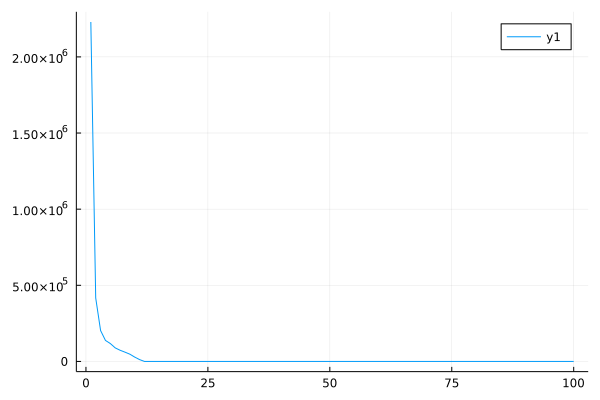

In [511]:
plot(1:length(signals_eig_vals),sort(signals_eig_vals,rev=true))

In [512]:
ind1 = findall(signals_eig_vals .== sort(signals_eig_vals,rev=true)[1])
ind2 = findall(signals_eig_vals .== sort(signals_eig_vals,rev=true)[2])

1-element Vector{Int64}:
 99

In [513]:
singal_proj_vecs = hcat(signals_eig_vecs[:,ind1],signals_eig_vecs[:,ind2]);

In [516]:
signal2D = top100_frequencies * singal_proj_vecs

12×2 Matrix{Float64}:
 -4112.48   1655.42
  -859.662  -137.001
 -5214.53   -856.175
 -1882.43   -302.685
 -3073.66   -531.505
  -770.152  -273.868
 -4191.8    -775.487
 -2648.66    216.71
 -2736.84   -368.227
 -2025.05   -396.079
 -1086.86   -201.093
  -759.653   -43.6969

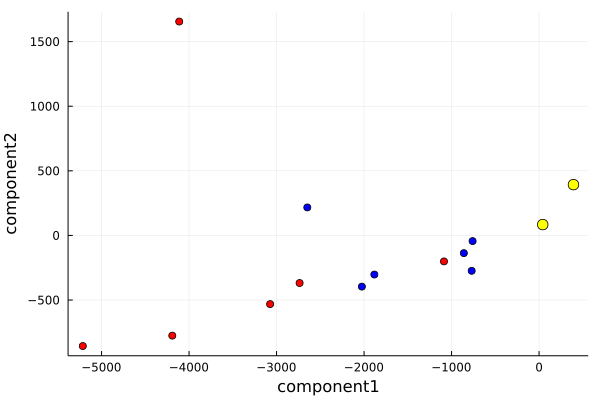

In [543]:
#plot scatter plot 
tmpcols=repeat(["red","blue"],6)
pp_pca=scatter(signal2D[:,1],signal2D[:,2],color=tmpcols )
# add test point to plot
scatter!(pp_pca,[top_frequencies_U[:,1]],[top_frequencies_U[:,2]],legend=false, color="yellow", markersize=6 ) 
        
xlabel!("component1")
ylabel!("component2")
plot(pp_pca)

## Category A is in <span style='color:red'> red </span>, and Category B is in <span style='color:blue'> blue </span>, Unknown Category is in  <span style='color:yellow'> yellow </span>.  Both music Synth-wave-with-metal-guitar.wav and U2 The Fairy's Kiss _FREE DOWNLOAD-111190096.wav are closer to <span style='color:blue'> blue points </span>. Thus, both are classified as Category B showed in the scatter plot based on PCA.

### e) Apply another approach to compare (eg. decision trees or random forests) to make a prediction. (3 points)

In [548]:
#train a decision tree to these periodogram power signatures
model = build_tree(labels, top100_frequencies)

Decision Tree
Leaves: 3
Depth:  2

In [549]:
print_tree(model)

Feature 41, Threshold 286.001841905382
L-> Feature 80, Threshold 672.8615932704652
    L-> Category B : 6/6
    R-> Category A : 1/1
R-> Category A : 5/5


In [550]:
#apply the tree to make a prediction
apply_tree(model, top100_frequencies_U)

2-element Vector{String}:
 "Category B"
 "Category B"

## Both music Synth-wave-with-metal-guitar.wav and The Fairy's Kiss _FREE DOWNLOAD-111190096.wav are classified as Category B based on decision tree.